# Logistic regression numerical optimization


In [268]:
import numpy as np

# Let's contrive a simple the dataset

In [273]:
X = np.array([[1,1.5],[0,1.5],[1,1],[2,0.5],[1,1.5],[0.5,0.5],[2,2],[2.5,1.5],[3,3],[2.5,2.5],[2,3],[3,2]])
X1 = np.ones(12).reshape(12,1)

In [274]:
X

array([[ 1. ,  1.5],
       [ 0. ,  1.5],
       [ 1. ,  1. ],
       [ 2. ,  0.5],
       [ 1. ,  1.5],
       [ 0.5,  0.5],
       [ 2. ,  2. ],
       [ 2.5,  1.5],
       [ 3. ,  3. ],
       [ 2.5,  2.5],
       [ 2. ,  3. ],
       [ 3. ,  2. ]])

In [468]:
#prepare the intercept
X = np.hstack((X1,X))

In [276]:
X.shape

(12, 3)

In [277]:
X

array([[ 1. ,  1. ,  1.5],
       [ 1. ,  0. ,  1.5],
       [ 1. ,  1. ,  1. ],
       [ 1. ,  2. ,  0.5],
       [ 1. ,  1. ,  1.5],
       [ 1. ,  0.5,  0.5],
       [ 1. ,  2. ,  2. ],
       [ 1. ,  2.5,  1.5],
       [ 1. ,  3. ,  3. ],
       [ 1. ,  2.5,  2.5],
       [ 1. ,  2. ,  3. ],
       [ 1. ,  3. ,  2. ]])

In [282]:
Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])[np.newaxis].T

In [283]:
Y.shape

(12, 1)

In [315]:
X[0]

array([ 1. ,  1. ,  1.5])

# To visualize the data 

In [284]:
import matplotlib.pyplot as plt

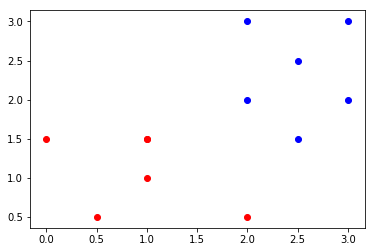

In [289]:
plt.scatter(X[:6,1],X[:6,2],color='red')
plt.scatter(X[6:,1],X[6:,2],color='blue')
plt.show()

# We can see that the line x1 + x2 = 3 is a good decision boundary to separate the 2 classes

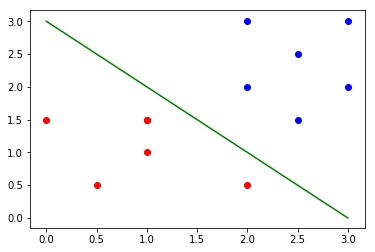

In [292]:
plt.scatter(X[:6,1],X[:6,2],color='red')
plt.scatter(X[6:,1],X[6:,2],color='blue')
plt.plot([3,0],[0,3],color = 'green')
plt.show()

# We try to learn this decision boundary through logistic regression with Gradient Descent

In [309]:
def sigmoid(x,theta):
    return (1/(1+np.exp(-x.dot(theta))))

In [464]:
iter = 100000
m = 12
n = 3
theta = np.random.rand(n,1)
alpha = 0.1
cost = np.zeros(iter)

In [462]:
#vectorized version of loss function
def getLossFunction(Y,X,theta):
    return (Y.T.dot(np.log(sigmoid(X,theta)))- (1-Y).T.dot(np.log(1-sigmoid(X,theta)) ))

#loop version of loss function
def getLossFunctionLoop(Y,X,theta):
    sum = 0
    for i in range(Y.size[0]):
        sum += Y[i]*np.log(sigmoid(X[i],theta)) - (1-Y[i])*np.log(1-sigmoid(X[i],theta))
    return sum

In [465]:
for i in range(iter):
    #vectorized version of gradient
    grad = (1/m)*(X.T.dot((sigmoid(X,theta)-Y)))
    theta = theta - (alpha)*grad
    cost[i] = getLossFunction(Y,X,theta);
    if i%10000 == 0:
        print('norm gradient      : ', np.linalg.norm(grad))
        print('loss function      : ', getLossFunction(Y,X,theta))
        print('loss function(loop): ', getLossFunction(Y,X,theta))

    

norm gradient      :  0.421108093043
loss function      :  [[ 7.03556651]]
loss function(loop):  [[ 7.03556651]]
norm gradient      :  0.00418070614276
loss function      :  [[ 0.04700728]]
loss function(loop):  [[ 0.04700728]]
norm gradient      :  0.00219842051661
loss function      :  [[ 0.02446764]]
loss function(loop):  [[ 0.02446764]]
norm gradient      :  0.0014952928313
loss function      :  [[ 0.01658244]]
loss function(loop):  [[ 0.01658244]]
norm gradient      :  0.00113375290782
loss function      :  [[ 0.01254972]]
loss function(loop):  [[ 0.01254972]]
norm gradient      :  0.000913269537491
loss function      :  [[ 0.01009763]]
loss function(loop):  [[ 0.01009763]]
norm gradient      :  0.000764693694168
loss function      :  [[ 0.00844836]]
loss function(loop):  [[ 0.00844836]]
norm gradient      :  0.000657752880125
loss function      :  [[ 0.00726282]]
loss function(loop):  [[ 0.00726282]]
norm gradient      :  0.0005770850329
loss function      :  [[ 0.0063694]]
loss 

In [438]:
theta

array([[-33.76983798],
       [ 10.52741306],
       [ 10.21523507]])

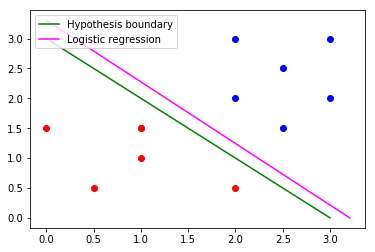

In [459]:
plt.scatter(X[:6,1],X[:6,2],color='red')
plt.scatter(X[6:,1],X[6:,2],color='blue')
plt.plot([3,0],[0,3],color = 'green', label = 'Hypothesis boundary')
plt.plot([0,-theta[0]/theta[1]],[-theta[0]/theta[2],0], color = 'magenta', label = 'Logistic regression')
plt.legend(loc='upper left')
plt.show()

In [352]:
# validate our result using sklearn
from sklearn.linear_model import LogisticRegression

In [374]:
logisticRegr = LogisticRegression(C = 1e10, max_iter=100000)
Y_sk = [0,0,0,0,0,0,1,1,1,1,1,1]

In [375]:
#Note that sklearn will create an intercept column of all 1 to us
logisticRegr.fit(X[:,1:],Y_sk)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [376]:
logisticRegr.coef_

array([[ 13.79034844,  13.40386844]])

In [377]:
logisticRegr.intercept_

array([-44.50657344])

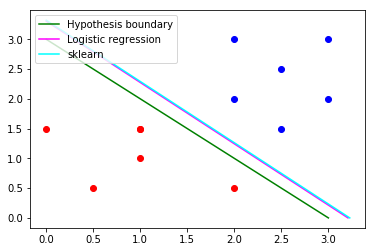

In [460]:
#again we see that our result is very similar to sklearn
plt.scatter(X[:6,1],X[:6,2],color='red')
plt.scatter(X[6:,1],X[6:,2],color='blue')
plt.plot([3,0],[0,3],color = 'green', label = 'Hypothesis boundary')
plt.plot([0,-theta[0]/theta[1]],[-theta[0]/theta[2],0], color = 'magenta', label = 'Logistic regression')
plt.plot([0,-logisticRegr.intercept_/logisticRegr.coef_[0][0]],[-logisticRegr.intercept_/logisticRegr.coef_[0][1],0], color = 'cyan', label = 'sklearn')
plt.legend(loc='upper left')
plt.show()

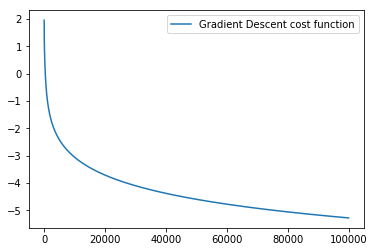

In [467]:
#show the loss in log scale
plt.plot(range(len(cost)),np.log(cost), label = 'Gradient Descent cost function')
plt.legend(loc = 'upper right')
plt.show()

# We now try to explore stochastic gradient descent

In [448]:
n_epoch = 100000
data = np.hstack((Y,X))
m = 12
n = 3
theta_sgd = np.random.rand(n,1)
alpha = 0.1
cost_sgd = np.zeros(iter)
    

In [449]:
for i in range(n_epoch):
    np.random.shuffle(data)
    for j in range(data.shape[0]):
        grad = (sigmoid(data[j,1:].reshape(n,1).T,theta_sgd)-data[j,0])*data[j,1:].reshape(n,1)        
        theta_sgd = theta_sgd - alpha*grad
    cost_sgd[i] = getLossFunction(data[:,0],data[:,1:],theta_sgd)
    if i%10000 == 0:
        print('norm gradient      : ', np.linalg.norm(grad))
        print('loss function      : ', getLossFunction(data[:,0],data[:,1:],theta_sgd))


norm gradient      :  1.40145953236
loss function      :  [ 3.42325164]
norm gradient      :  1.09764771303e-08
loss function      :  [ 0.00425797]
norm gradient      :  0.00629917656319
loss function      :  [ 0.002144]
norm gradient      :  0.00268160895118
loss function      :  [ 0.00143307]
norm gradient      :  0.00360693433037
loss function      :  [ 0.00107655]
norm gradient      :  8.48809323996e-10
loss function      :  [ 0.00086197]
norm gradient      :  0.00240973002118
loss function      :  [ 0.00071885]
norm gradient      :  0.00115718273921
loss function      :  [ 0.00061637]
norm gradient      :  0.00101329231128
loss function      :  [ 0.00053953]
norm gradient      :  1.46839661175e-10
loss function      :  [ 0.00047974]


In [450]:
theta_sgd

array([[-33.42421411],
       [ 10.42108737],
       [ 10.10887402]])

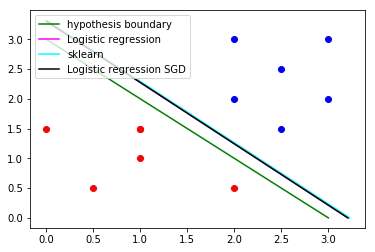

In [451]:
#Let's see how stochastic gradient descent performs
plt.scatter(X[:6,1],X[:6,2],color='red')
plt.scatter(X[6:,1],X[6:,2],color='blue')
plt.plot([3,0],[0,3],color = 'green', label = 'Hypothesis boundary')
plt.plot([0,-theta[0]/theta[1]],[-theta[0]/theta[2],0], color = 'magenta', label = 'Logistic regression')
plt.plot([0,-logisticRegr.intercept_/logisticRegr.coef_[0][0]],[-logisticRegr.intercept_/logisticRegr.coef_[0][1],0], color = 'cyan', label = 'sklearn')
plt.plot([0,-theta_sgd[0]/theta_sgd[1]],[-theta_sgd[0]/theta_sgd[2],0], color = 'black', label = 'Logistic regression SGD')
plt.legend(loc='upper left')
plt.show()

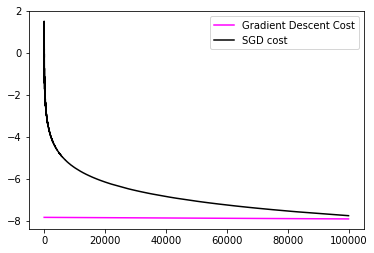

In [452]:
#How about the cost function
#show the loss in log scale
plt.plot(range(len(cost)),np.log(cost), color = 'magenta',label = 'Gradient Descent Cost')
plt.plot(range(len(cost_sgd)),np.log(cost_sgd), color = 'black',label = 'SGD cost')
plt.legend(loc='upper right')
plt.show()

# We can see that using GD reduce the cost function within a smaller number of iterations, but the computational cost to go through the dataset can be more costly

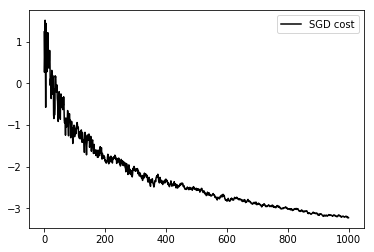

In [457]:
plt.plot(range(1000),np.log(cost_sgd[:1000]), color = 'black',label = 'SGD cost')
plt.legend(loc='upper right')
plt.show()

# Zoom into SGD cost function to see the stochastic nature

# Taking derivatives can be challenging in some cases. We now explore Auto-Differentiation tool in Pytorch